In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [16]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [17]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [18]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.

#inspector
inspector = inspect(engine)

#get columns

columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
    
#query Measuremnt column by date, descending order, pull the first result

session.query(Measurement.date).order_by(Measurement.date.desc()).first()



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


('2017-08-23',)

One year ago is:  2016-08-23


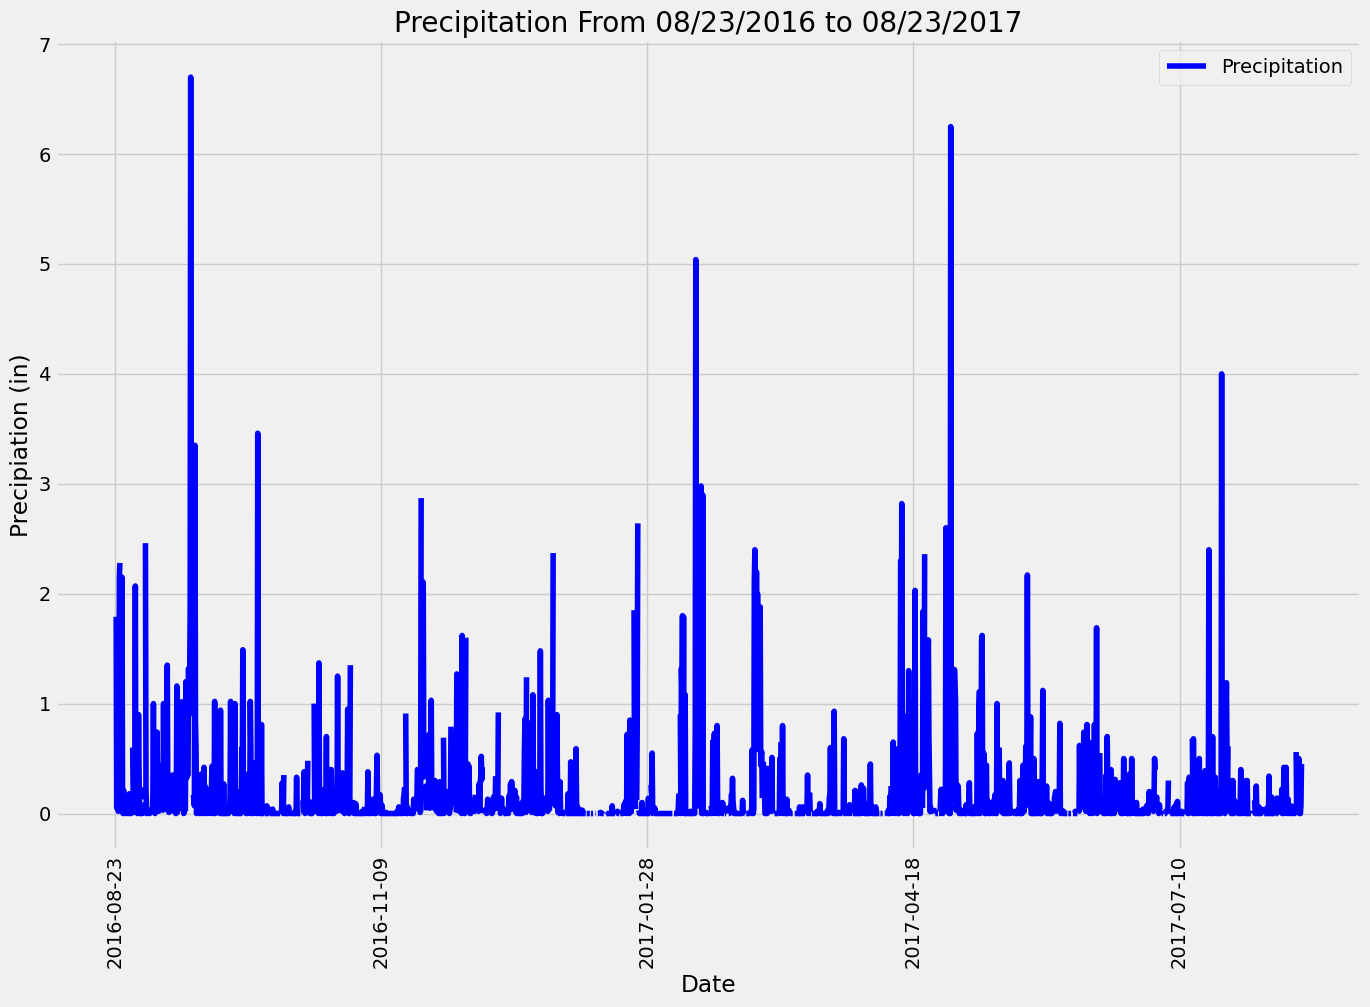

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("One year ago is: ", year_ago)

# Perform a query to retrieve the data and precipitation scores

data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    all()
data

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(data, columns = ['Date', "Precipitation"])
date_index =df.set_index('Date')

# Sort the dataframe by date

sorted_df = date_index.sort_values (by = 'Date')


# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize = (15, 10))
sorted_df.plot(ax = ax, x_compat = True, color = "blue")
plt.title("Precipitation From 08/23/2016 to 08/23/2017")
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.ylabel("Precipiation (in)")
plt.show()


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data

sorted_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset

num_stations = session.query(Station.id).count()
num_stations


9

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#lowest
low = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

#highest
high = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

#average
average = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(average)

    

[(71.66378066378067,)]


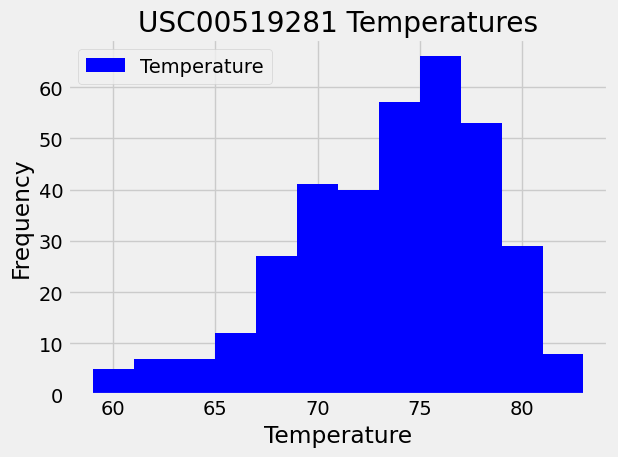

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

histogram = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station == 'USC00519281').\
    all()

#print

histogram_df = pd.DataFrame(histogram, columns = ['Date', 'Temperature'])
fig, ax = plt.subplots()
histogram_df.plot.hist(bins=12, ax = ax, color="blue")
plt.title("USC00519281 Temperatures")
plt.xlabel("Temperature")
#plt.xticks
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("USC00519281_temp.png")
plt.show()



# Close session

In [31]:
# Close Session
session.close()